# Final Project Rakamin DS#25 - Team CARR-ELO

- Batch     : Data Science 25th
- Kelompok  : Kel.5
- Dataset   : Car Auction Prices 
https://www.kaggle.com/datasets/tunguz/used-car-auction-prices 

In [1]:
!python --version

Python 3.9.12


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Industri mobil bekas merupakan suatu industri yang menarik untuk diamati pertumbuhannya disamping itu harga mobil terus berubah tergantung berbagai faktor. Di bawah ini adalah penjelasan atas fitur/kolom dari data mobil bekas yang paling penting untuk dipahami ketika akan membeli mobil bekas di lelang:

- `Year` : Tahun produksi mobil
- `Make` : Merk/pabrikan mobil
- `Model` : Model/jenis mobil dari brand tertentu. cth: avanza, innova, mobilio, dll
- `Trim` : Jenis mobil berbeda dari model brand tertentu
- `Body` : Tipe/Jenis dari mobil cth: sedan, suv, dll
- `Transmission` : Jenis transmisi dari mobil yaitu manual dan automatic
- `VIN` : Vehicle identification number/Plat Nomor Mobil
- `State` : Daerah dimana mobil dilelang
- `Condition` : Kondisi mobil saat dilakukan lelang mulai dari 1 - 5
- `Odometer` : Jarak tempuh dari mobil sejak keluar pabrik
- `Color` : Warna exterior mobil
- `Interior` : Warna interior mobil
- `Seller` : Penjual mobil/dealer
- `mmr` : Manhiem market record/harga estimasi market price
- `sellingprice` : Harga mobil yang terjual pada saat lelang
- `saledate` : tanggal mobil terjual di lelang

In [3]:
df = pd.read_csv('C:/Users/satri/Documents/DS-Rakamin/Final Project/1/archive/car_prices.csv', on_bad_lines='skip')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Stage 1 : EDA, Insights, & Visualization**

## Part 1.1 - Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  object 
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 68.2+ MB


In [ ]:
df.isnull().sum().sort_values(ascending = False)

transmission    65353
body            13195
condition       11794
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
vin                 4
year                0
state               0
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Terdapat kolom yang memiliki missing value, antara lain:
 - make
 - model
 - trim
 - body
 - transmission 
 - vin
 - condition
 - odometer
 - color
 - interior

kolom yang memiliki missing value terbanyak ada di kolom transmisson

In [ ]:
df.duplicated().any()

False

Tidak ada data yang duplikat di dalam dataset

In [ ]:
#  kategorisasi
nums = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cats = ['make','model', 'body', 'transmission', 'trim', 'vin', 'state','color', 'interior', 'seller', 'saledate']

### Fitur Deskriptif

In [ ]:
df[nums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   condition     547043 non-null  object 
 2   odometer      558743 non-null  float64
 3   mmr           558837 non-null  object 
 4   sellingprice  558837 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 21.3+ MB


In [ ]:
df[nums].describe()

,year,odometer,sellingprice
count,558837.000000,558743.000000,558837.000000
mean,2010.038927,68320.016670,13611.264979
std,3.966864,53398.544224,9749.430357
min,1982.000000,1.000000,1.000000
25%,2007.000000,28371.000000,6900.000000
50%,2012.000000,52254.000000,12100.000000
75%,2013.000000,99109.000000,18200.000000
max,2015.000000,999999.000000,230000.000000


In [ ]:
df[cats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   make          548536 non-null  object
 1   model         548438 non-null  object
 2   body          545642 non-null  object
 3   transmission  493484 non-null  object
 4   trim          548186 non-null  object
 5   vin           558833 non-null  object
 6   state         558837 non-null  object
 7   color         558088 non-null  object
 8   interior      558088 non-null  object
 9   seller        558837 non-null  object
 10  saledate      558837 non-null  object
dtypes: object(11)
memory usage: 46.9+ MB


In [ ]:
df[cats].describe()

,make,model,body,transmission,trim,vin,state,color,interior,seller,saledate
count,548536,548438,545642,493484,548186,558833,558837,558088,558088,558837,558837
unique,96,973,87,4,1966,550297,64,46,17,14266,3766
top,Ford,Altima,Sedan,automatic,Base,automatic,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,199437,475914,55817,22,82945,110970,244329,19693,5334


Analisis Numericals:
- adanya anomali pada nilai minimum sellingprice 

Analisis Categoricals:
 - Kolom transmission didominasi oleh mobil dengan transmisi automatic (lebih dari 50%),
 - Kolom color dan interior didominasi oleh mobil dengan warna exterior dan interior black
 - Kolom make didominasi oleh mobil dengan merk Ford.

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom make:
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: make, Length: 96, dtype: int64

Value count kolom model:
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: model, Length: 973, dtype: int64

Value count kolom body:
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: body, Length: 87, dtype: int64

Value count kolom transmission:
automatic    475914
manual        17544
sedan            15
Sedan            11
Name: transmissio

Pengamatan Descriptive Statistik:
- Data terdiri dari 558811 baris dan 16 kolom
- Tidak ada issue pada nama dan isi setiap kolom
- Tampak beberapa kolom masih memiliki null/missing values kolom make, mode, trim, body, transmission, vin, condition, odometer, color, interior)
- Missing values terbesar berada pada kolom transmission sejumlah 65353


## Part 1.2 - Univariate Analysis

### Boxplot

TypeError: ignored

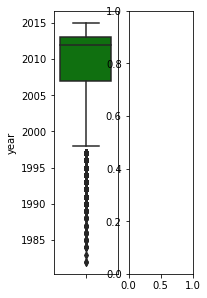

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

Definisikan outlier menggunakan Quantile (IQR)

In [ ]:
def detect_outliers(df, x):
    Q1 = df[x].quantile(.25)
    Q3 = df[x].quantile(.75)
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

#### Detect Outlier Features

In [ ]:
out_cond = detect_outliers(df, 'condition').shape[0] 
print('Jumlah outlier column condition :', out_cond)

In [ ]:
out_odo = detect_outliers(df, 'odometer').shape[0]
print('Jumlah outlier column odometer :', out_odo)

In [ ]:
out_mmr = detect_outliers(df, 'mmr').shape[0]
print('Jumlah outlier column mmr :', out_mmr)

Dari column feature dengan analisa IQR pada plot boxplot dan detect outlier, dilihat bahwa column condition tidak memiliki outlier. Untuk odometer memiliki outlier sebanyakk 10375 dan column mmr memiliki 16315 outlier. 

#### Detect Outlier Target

In [ ]:
out_sell = detect_outliers(df, 'sellingprice').shape[0]
print('Jumlah outlier column sellingprice :', out_sell)

Dari column target dengan analisa IQR pada plot boxplot dan detect outlier, dilihat bahwa column sellingprice memiliki 16354 outlier

### Analisa Boxplot Features dan Target

Dari gambar boxplot didapat bahwa column condition tidak memiliki outlier dan distribusinya cenderung negative skewed. Untuk column lain yaitu odometer,mmr dan sellingprice banyak outlier yang terletak di nilai yang lebih besar (positive skewed). Serta dari function detect outlier bisa melihat banyaknya outlier. Oleh karena itu pada data preprocessing dan cleaning, bisa dilakukan penghapusan outlier dengan metode quantile IQR maupun menggunakan log transformation untuk mengatasi positive skewed

### Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

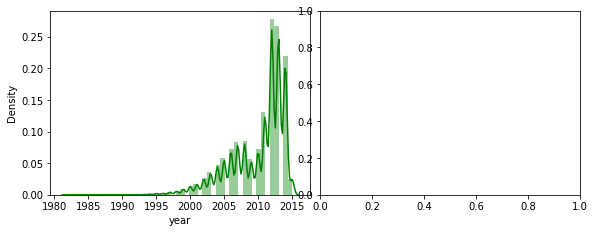

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.distplot(df[nums[i]], color='green')
    plt.tight_layout()

### Analisa Distribution Plot

- Dari distribution plot terlihat untuk feature odometer, selling price, serta mmr memiliki distribusi yang positif (positively skewed) dimana nilai outlier cukup jauh ke kanan atau berada di nilai yang besar. sedangkan umumnya data fitur tersebar nilai yang cukup rendah.

- Target memiliki kemiringan yang positif dimana nilai outliernya pun berada pada nilai yang besar

- fitur condition perlu diperhatikan dikarenakan memiliki skala ordinal pada distribution plot

- fitur tahun memiliki distribusi kemiringan negatif, yang dimana data/transaksi terjadi cukup benyak >2010



### Countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

ValueError: ignored

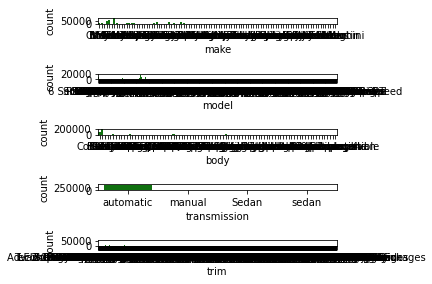

In [ ]:
for i in range(0, len(cats)):
    plt.subplot(5,1, i+1)
    sns.countplot(df[cats[i]], color='green', orient='h')
    plt.tight_layout()

###Analisa Countplot Features 

Dari countplot dapat terlihat,pada beberapa feature seperti 'make', 'model', 'trim', 'body', 'color', 'interior'  'vin', 'state', terlihat sangat banyak sekali kategori, ada kategori yang mendominasi dan ada yang jumlahnya sangat jauh lebih sedikit. Kategori yang terlalu banyak dapat menurunkan performance komputasi machine learning. Kategori yang jumlah nya sangat lebih sedikit ini dapat dimasukkan ke kategori baru yaitu 'other' misalnya.

## Check Duplicate

In [ ]:
#check duplicate
df.duplicated().sum()

0

## Missing Value

In [ ]:
df.isna().sum().sort_values(ascending=False)

NameError: ignored

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

NameError: ignored

<Figure size 1080x1080 with 0 Axes>

#Part 1.3 - Multivariate Analysis

In [ ]:
corr=df.corr()
corr

NameError: ignored

### Correlation Heatmap

In [ ]:
# Correlation Heatmap 
mask = np.triu(np.ones_like(corr, dtype=bool))# Generate a mask for upper traingle
plt.figure(figsize=(10,7))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, annot=True, cmap=cmap,annot_kws={'size':14})
plt.title("Correlation Heatmap", fontsize =24)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

NameError: ignored

Dari Correlation Heatmap diatas diperoleh beberapa informasi berikut :

*   Target sellingprice dan feature mmr memiliki korelasi positif yang sangat kuat.
*   Target juga memiliki korelasi yang cukup kuat dengan beberapa feature independent lainnya (year, condition, odometer)
*   Feature odometer dan year memiliki korelasi negatif yang sangat kuat. Secara umum nilai koefisien korelasi pearson yang lebih besar dari 0,7 menunjukkan adanya multi-collinearity (ada kemungkinan kedua features tersebut redundan dan saling mempengaruhi secara terbalik terhadap variabel lain).

### Pair Plots

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df, diag_kind='kde')

Dari pair plot diatas terlihat bahwa :

*   mahal, sebaliknya semakin rendah condition maka harga akan semakin murah.
*   Semakin tinggi odometer maka harga akan semakin rendah, sebaliknya jika odometer rendah maka sellingprice akan tinggi.

*   Target sellingprice memiliki korelasi positif linear dengan feature mmr. Semakin tinggi nilai mmr maka akan semakin tinggi nilai sellingprice.

# Part 1.4 - Business Insight

### Top 10 Mobil yang laku terjual berdasarkan brand

In [ ]:
df['make'].value_counts().iloc[:10]

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['make'], order=df['make'].value_counts().index[:10])
plt.title('Top makes')
plt.ylabel("Count")
plt.show()

### Top 10 model yang laku terjual

In [ ]:
df['model'].value_counts().iloc[:10]

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['model'], order=df['model'].value_counts().index[:10])
plt.title('Top Sold Model')
plt.ylabel("Count")
plt.show()

### Top 10 Tipe/jenis mobil yang laku terjual

In [ ]:
df['body'].value_counts().iloc[:10]

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['body'], order=df['body'].value_counts().index[:10])
plt.title('Top Sold Body')
plt.ylabel("Count")
plt.show()

### Top 10 state/wilayah dengan pembelian mobil terbanyak

In [ ]:
df['state'].value_counts().iloc[:10]

In [ ]:
plt.figure(figsize = (12,5), dpi=100)
sns.countplot(df['state'], order=df['state'].value_counts().index[:10])
plt.title('Top Sold State')
plt.ylabel("Count")
plt.show()

### Transmisi yang lebih laku terjual

In [ ]:
sns.countplot(x = 'transmission', data = df)
plt.title('Transmission', fontsize = 16, fontweight='bold');

In [ ]:
df['transmission'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%.1f%%', figsize=(6,6),fontsize=12)
plt.title('Transmission',fontsize=16, fontweight='bold')
plt.ylabel(None)
plt.show()

### Sebaran unit yang laku terjual sesuai kondisi

In [ ]:
plt.hist(df['condition'],bins=50)
plt.title('test')
plt.xlabel('condition')
plt.ylabel('count')
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='condition',y='sellingprice',data=df)
plt.title('Condition Car and Selling Price',fontsize=16, fontweight='bold')
plt.xlabel('Condition',fontsize=12)
plt.ylabel('Selling Price', fontsize=12)

plt.show()

### Summary Business Insight

Berdasarkan dataset yang kami analisa, kami dapati kondisi sebagai berikut:


*   Brand Ford, Chevrolet & nissan merupakan brand yang laku terjual dan banyak diminati di amerika
Dealer dapat menyusun komposisi stok unit sesuai unit yang diminati masyarakat

*   Preferensi tipe mobil berdasarkan mobil yang terjual adalah tipe sedan dan SUV.
Dealer dapat mempriotitaskan untuk membeli varian sedan & suv karena banyak diminati

*   Unit yang laku terjual dan banyak diminati adalah unit dengan transmisi automatic.
Dealer dapat membeli unit stok dengan proporsi terbanyak adalah transmisi automatic 

*  Semakin baik kondisi mobil (rating diatas 3.5) maka harga belinya juga semakin tinggi sementara unit dengan kondisi buruk banyak diminati karna harga lebih murah.
Dealer dapat membeli unit dengan kualitas kondisi dibawah 3.5 untuk kemudian diperbaiki sebelum dijual dengan harga yang lebih baik untuk mendapatkan keuntungan yang lebih baik

